# **Comparison of ANN and CNN on CIFAR-10 Dataset**

This notebook explores the performance of Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN) on the CIFAR-10 dataset. The CIFAR-10 dataset, consisting of 1,00,000 32x32 color images across 10 classes, serves as a benchmark for image classification tasks.

Key objectives:
1. Train and evaluate both ANN and CNN models on the CIFAR-10 dataset.
2. Compare their performance metrics, including training loss, validation loss, training accuracy, and validation accuracy.
3. Highlight the advantages of CNNs in handling spatial and hierarchical features in image data over traditional ANNs.

By the end of this notebook, you will gain insights into why CNNs are generally better suited for image-based tasks and how their architectural differences impact model performance.

## Importing Libraries
- numpy
- pandas
- tensorflow
- keras
- matplotlib

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers
import matplotlib.pyplot as plt

## Loading Dataset - CIFAR(10)
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## Preprocessing
- Getting dimensions of training data
- Classes of testing data
- Ploting images
- Normalizing training and testing datasets

In [17]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
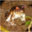

In [5]:
X_train[0]

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [49]:
y = y_train.reshape(-1,)
y
y_test = y_test.reshape(-1,)

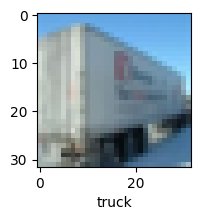

<Figure size 640x480 with 0 Axes>

In [45]:
#plot image

def plot_image(x, y, index):
  plt.figure(figsize= (2,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
  plt.show()
  plt.tight_layout()

plot_image(X_train, y, 15)

In [21]:
# Normalizing training images
X_train = X_train / 255
X_test = X_test / 255

## Training using ANN's
- 4 Dense layers

- Complied the model

- Model Summary
            



In [27]:
# Using ANN

ann = tf.keras.models.Sequential()
ann.add(layers.Flatten(input_shape= (32,32,3)))
ann.add(layers.Dense(3000, activation='relu'))
ann.add(layers.Dense(1000, activation= 'relu'))
ann.add(layers.Dense(500, activation= 'relu'))
ann.add(layers.Dense(10, activation= 'sigmoid'))

## compiling the model
ann.compile(optimizer= 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics= ['accuracy'],)

## model summary
ann.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,725,510 (48.54 MB)

 Trainable params: 12,725,510 (48.54 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = ann.fit(X_train, y_train,
        validation_data= (X_test, y_test), epochs= 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3009 - loss: 1.9402 - val_accuracy: 0.4012 - val_loss: 1.6765
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4158 - loss: 1.6489 - val_accuracy: 0.4188 - val_loss: 1.6144
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4502 - loss: 1.5508 - val_accuracy: 0.4734 - val_loss: 1.4968
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4753 - loss: 1.4862 - val_accuracy: 0.4686 - val_loss: 1.4802
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4952 - loss: 1.4268 - val_accuracy: 0.4879 - val_loss: 1.4427
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5144 - loss: 1.3781 - val_accuracy: 0.4714 - val_loss: 1.4828
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5254 - loss: 1.3366 - val_accuracy: 0.4842 - val_loss: 1.4327
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5386 - loss: 1.3002 

### Evaluation of model
- Training Accuracy- 56.6%
- Training loss- 1.229
- Validation Accuracy- 52.2%
- Validation loss- 1.344

In [34]:
# Get the loss at the end of the last epoch
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]

# Print the final losses
print(f"Training Loss at the End of Last Epoch: {final_training_loss:.4f}")
print(f"Validation Loss at the End of Last Epoch: {final_validation_loss:.4f}")

Training Loss at the End of Last Epoch: 1.2273
Validation Loss at the End of Last Epoch: 1.3449


## Training Using CNN's
- 3 convolutional layers
- 3 Dense layers
- Model compliation
- Model summary

In [82]:
# Using CNN

cnn = tf.keras.models.Sequential()

## convolutional layers
cnn.add(layers.Conv2D(filters= 62, kernel_size= (2,2), activation= 'relu',padding= 'valid',input_shape= (32,32,3)))
cnn.add(layers.MaxPool2D(pool_size= (2,2),))
cnn.add(layers.Conv2D(filters= 80, kernel_size= (3,3), activation= 'relu',padding= 'valid',))
cnn.add(layers.MaxPool2D(pool_size= (2,2),))
cnn.add(layers.Conv2D(filters= 40, kernel_size= (3,3), activation= 'relu',padding= 'valid'))
cnn.add(layers.MaxPool2D(pool_size= (2,2),))

## dense layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(units= 100, activation= 'relu',))
cnn.add(layers.Dense(units= 50, activation= 'relu',))
cnn.add(layers.Dense(units= 10, activation= 'softmax',))

## model compilation
cnn.compile(optimizer= 'adam',
            loss= 'sparse_categorical_crossentropy',
            metrics= ['accuracy'])

## model summary
cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 31, 31, 62)          │             806 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 15, 15, 62)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 13, 13, 80)          │          44,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 6, 6, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 40)            │          28,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 2, 2, 40)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 100)                 │          16,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,026 (375.10 KB)

 Trainable params: 96,026 (375.10 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
cnn.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.3161 - loss: 1.8368
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5480 - loss: 1.2705
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6071 - loss: 1.1051
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6429 - loss: 1.0029
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6643 - loss: 0.9534
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6924 - loss: 0.8830
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7017 - loss: 0.8469
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7228 - loss: 0.7899
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7324 - loss: 0.7637
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7430 - loss: 0.7302


### Evaluating the CNN model
- Training Accuracy- 74.30%
- Training loss- 0.834
- Validation Accuracy- 66.11%
- Validation loss- 0.9556

In [77]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6611 - loss: 0.9565


[0.9673579931259155, 0.6610000133514404]

### Predicting

In [78]:
pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [79]:
# predicting outcomes
def predictions(x, y, index):
  pred_out = np.argmax(pred[index])
  plot_image(x,y,index)

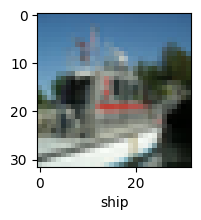

<Figure size 640x480 with 0 Axes>

In [80]:
predictions(X_test,y_test,600)

## Advantages of CNNs Over ANNs for Image Data:

1. **Spatial Awareness**:  
   CNNs use convolutional layers to preserve the spatial relationships between pixels, enabling them to understand patterns like edges, textures, and shapes. ANNs treat all input pixels equally, disregarding spatial structure.

2. **Parameter Efficiency**:  
   CNNs share weights through convolutional filters, significantly reducing the number of trainable parameters. This makes CNNs more efficient and scalable for large image datasets compared to fully connected ANNs.

3. **Feature Hierarchies**:  
   CNNs extract low-level features (e.g., edges) in initial layers and progressively learn higher-level features (e.g., objects) in deeper layers. ANNs lack this hierarchical feature learning capability, making them less effective for image recognition tasks.

4. **Translation Invariance**:  
   Pooling layers in CNNs provide translation invariance, allowing the network to recognize objects regardless of their position in the image. ANNs cannot inherently achieve this without significant preprocessing.

5. **Computational Efficiency**:  
   Due to their localized connections and weight sharing, CNNs are computationally more efficient for image data compared to the dense connections of ANNs.